<a href="https://colab.research.google.com/github/suhrobm/Continuous-Mathematical-Modeling/blob/commonbranch/CMM_Arm_Race.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **INTRODUCTION**

Richardson drew upon his development of mathematical equations in meteorology and applied them to human behavior. His initial focus was on the arms race that preceded the First World War. In terms of his modeling, this is his best-known work.

Although he was not the first person to use the term arms race, he was the first to formalize what it meant precisely. Richardson begins with a linear model for two nations, expressed as a pair of differential equations:

1. dx/dt = ay - mx + r

2. dy/dt = bx - ny + s

where x represents the military spending of one nation and y the military spending of its main rival (competitor, opponent). The drag (obstacle, barrier) on increasing military spending at ever higher levels is represented by the term -mx for the first country (aka country x) and -ny for the second country (referred to as country y); r and s are historical constants reflecting the respective hostility (opposition, enmity, unfriendliness, ill will) of x and y toward each other.

Here, a, b, m, and n are positive constants while r and s are constants which can be positive or negative. The constants a and b measure mutual fear; the constants m and n represent proportionality factors for the “internal brakes” to further arms increases.

Positive values for r and s correspond to underlying factors of ill will or distrust that would persist even if arms expenditures dropped to zero. Negative values for r and s indicate a contribution based on goodwill.

The dynamic behavior of this system of differential equations depends on the relative sizes of ab and mn together with the signs of r and s. Although the model is a relatively simple one, it allows us to consider several different long-term out-comes. It’s possible that two nations might move simultaneously toward mutual disarmament, with x and y each approaching zero.

A vicious cycle of unbounded increases in x and y is another possible scenario. A third eventuality is that the arms expenditures asymptotically approach a stable point (x, y) regardless of the initial level of arms expenditures. In other cases, the eventual outcome depends on the starting point.


In [1]:
'''

-mx: represents increasing military spending at ever higher levels
-ny: represents increasing military spending at ever higher levels

a: is positive constant
b: is positive constant
m: is positive constant
n: is positive constant

r: is historical constant reflecting the respective hostility, can be + or -
   + value for r correspond to underlying factor of ill will or distrust that would persist even if arms expenditures dropped to zero
   - value for r indicates a contribution based on goodwill

s: is historical constant reflecting the respective hostility, can be positive or negative
   + value for s correspond to underlying factor of ill will or distrust that would persist even if arms expenditures dropped to zero
   - value for s indicates a contribution based on goodwill

the constants a and b measure mutual fear
the constants m and n represent proportionality factors for the “internal brakes” to further arms increases

'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.integrate import odeint, solve_ivp
import seaborn as sns
import math

Extension of Richardson Arm's Race Model

This is an execution of the three-country Richardson arms race model.

Extend the Richardson model to three nations, deriving a system of linear differential equations, if the three are mutually fearful: each one is spurred (encouraged, impulsed, motivated, drived) to arm by the expenditures of the other two. How might the equations change if two of the nations are close allies not threatened by the arms buildup of each other, but fearful of the armaments of the third. Investigate the long-term behavior of such arms races.

Thus, the system of linear differential equations should be as below:

                                    1. dx/dt = (-c11x) + c12y + c13z + e1

                                    2. dy/dt = c21x + (-c22y) + c23z + e2

                                    3. dz/dt = c31x + c32y + (-c33z) + e3

the rate-factors -c11x, -c22x, -c33x represent the drag (obstacle, barrier) on increasing military spending at ever higher levels

the constants c11, c22 and c33 represent proportionality factors for the “internal brakes” to further arms increases

c12, c13, c21, c23, c31, c32 are positive constants and measure mutual fear

e1, e2, e3: are historical constants reflecting the respective hostility, can be + or -

possitive value correspond to underlying factor of ill will or distrust that would persist even if arms expenditures dropped to zero
      
negative value indicates a contribution based on goodwill





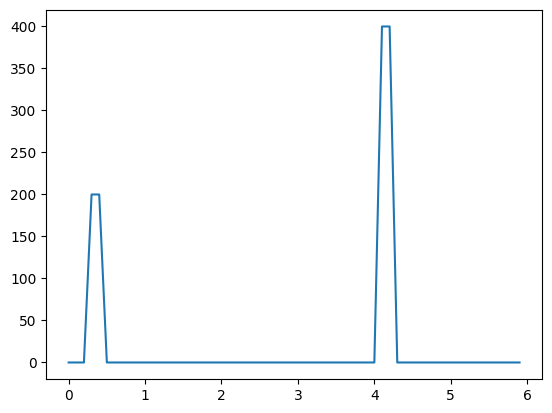

In [2]:
''' setting model parameters' values '''

c12, c13 = 2, 2  # fear factor for country one
c21, c23 = 2, 2  # fear factor for country two
c31, c32 = 2, 2  # fear factor for country three

c11 = 1  # restraint factor for country one
c22 = 1  # restraint factor for country two
c33 = 1  # restraint factor for country three

e1 = -5
e2 = -5
e3 = +5

''' initial values '''
c1_0 = +10   # initial weapons held by country one
c2_0 = +10   # initial weapons held by country two
c3_0 = +10   # initial weapons held by country three


''' bundle parameters for ODE solver '''
params = [c12, c13, c21, c23, c31, c32, c11, c22, c33, e1, e2, e3]

''' bundle initial conditions for ODE solver '''
y0 = [c1_0, c2_0, c3_0]


''' make time array '''
tStop = 6
tInc = 0.1
t = np.arange(0., tStop, tInc)
len(t)

def g(t_0):
    return(((t > t_0)*(t < t_0 + 0.25)))

plt.plot(t, 200 * (g(0.2)) + 400 * g(4))


In [3]:
def f(y, t, params):

    c1_0, c2_0, c3_0 = y
    c12, c13, c21, c23, c31, c32, c11, c22, c33, e1, e2, e3 = params

    t_0 = 10
    t_1 = 11

    derivs = [ (c12*c2_0 - c11*c1_0 + e1) + (2*(t > t_0)*(t < t_0+0.5)) + (3*(t > t_1)*(t < t_1+0.5)),
               (c21*c1_0 - c22*c2_0 + e2) + (1*(t > t_0)*(t < t_0+0.5)) + (1*(t > t_1)*(t < t_1+0.5)),
               (c31*c2_0 - c33*c3_0 + e3) + 0,
             ]

    return derivs



''' solving '''
psoln = odeint(f, y0, t, args=(params,), rtol=1e-10, hmax = 0.01, tcrit = 5)

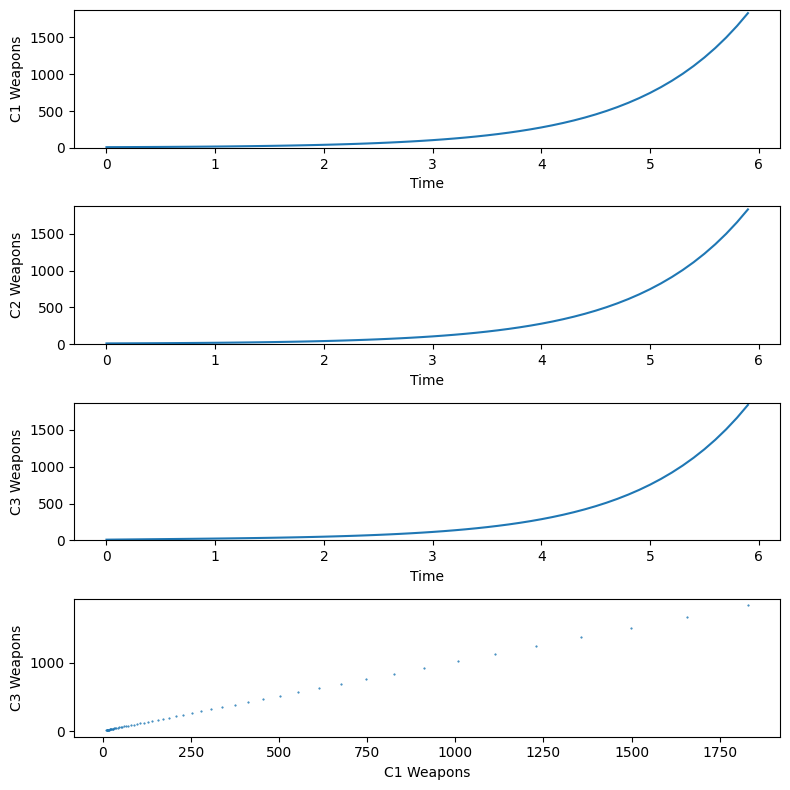

In [4]:
''' plotting results '''
fig = plt.figure(1, figsize=(8,8))

# Plot C1 Weapons as a function of time
ax1 = fig.add_subplot(411)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('Time')
ax1.set_ylabel('C1 Weapons')
ax1.set_ylim(-1, max(psoln[:,0])+ math.sqrt(max(psoln[:,0])) )

# Plot C2 Weapons as a function of time
ax2 = fig.add_subplot(412)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('Time')
ax2.set_ylabel('C2 Weapons')
ax2.set_ylim(-1, max(psoln[:,0])+ math.sqrt(max(psoln[:,1])) )

# Plot C2 Weapons as a function of time
ax2 = fig.add_subplot(413)
ax2.plot(t, psoln[:,2])
ax2.set_xlabel('Time')
ax2.set_ylabel('C3 Weapons')
ax2.set_ylim(-1, max(psoln[:,0])+ math.sqrt(max(psoln[:,2])) )


# Plot phase-space: C1 Weapons vs C3 Weapons
ax3 = fig.add_subplot(414)
ax3.plot(psoln[:,0], psoln[:,2], '.', ms=1)
ax3.set_xlabel('C1 Weapons')
ax3.set_ylabel('C3 Weapons')

plt.tight_layout()
plt.show()

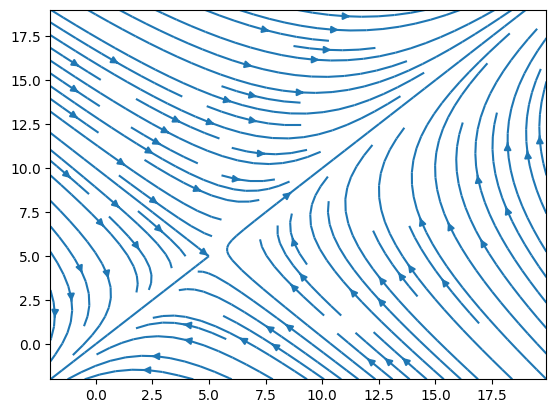

In [5]:
from pylab import *

x, y = meshgrid(arange(-2, 20, .1), arange(-2, 20, 1))

xdot = -c11*x + c12*y + e1
ydot = c21*x - c22*y + e2

plt.figure()
plt.streamplot(x, y, xdot, ydot)

x=linspace(-2, 20, 110)
y=linspace(-2, 20, 110)

Model With Added Carrying Capacity

In [6]:
''' setting model parameters' values '''

c12, c13 = 3, 3  # fear factor for country one
c21, c23 = 2, 2  # fear factor for country two
c31, c32 = 1, 1  # fear factor for country three

c11 = 0.9  # restraint factor for country one
c22 = 0.78  # restraint factor for country two
c33 = 1  # restraint factor for country three

e1 = 6
e2 = 0.3
e3 = 4

''' initial values '''
c1_0 = +100   # initial weapons held by country one
c2_0 = +20  # initial weapons held by country two
c3_0 = +10   # initial weapons held by country three


''' bundle parameters for ODE solver '''
params = [c12, c13, c21, c23, c31, c32, c11, c22, c33, e1, e2, e3]

''' bundle initial conditions for ODE solver '''
y0 = [c1_0, c2_0, c3_0]


''' make time array '''
tStop = 3
tInc = 0.1
t = np.arange(0., tStop, tInc)
len(t)

def g(t_0):
    return(((t > t_0)*(t < t_0+0.25)))

k = 200*(g(0.2)) + (400*g(2))

In [7]:
def f(y, t, params):
    c1_0, c2_0, c3_0 = y
    c12, c13, c21, c23, c31, c32, c11, c22, c33, e1, e2, e3 = params

    t_0 = 0.2
    t_1 = 0.3
    t_2 = 2
    t_3 = 4.5
    t_4 = 6

    (t_5, t_6, t_7, t_8) = (1, 1.3, 2, 2.3)

    derivs = [((1-(c1_0/1200)) * (c12*c2_0 - c11*c1_0 + e1)) + (500*(t > t_0)*(t < t_0+0.25)) + (700*(t > t_2)*(t < t_2+0.5)),
              ((1-(c2_0/750))  * (c21*c1_0 - c22*c2_0 + e2)) + (100*(t > t_0)*(t < t_0+0.5)) + (300*(t > t_2)*(t < t_2+0.5)),
              ((1-(c3_0/750))  * (c31*c2_0 - c33*c3_0 + e3)) + 0
             ]

    return derivs



''' solving '''
psoln = odeint(f, y0, t, args=(params,), hmax = 0.01, tcrit = 5)


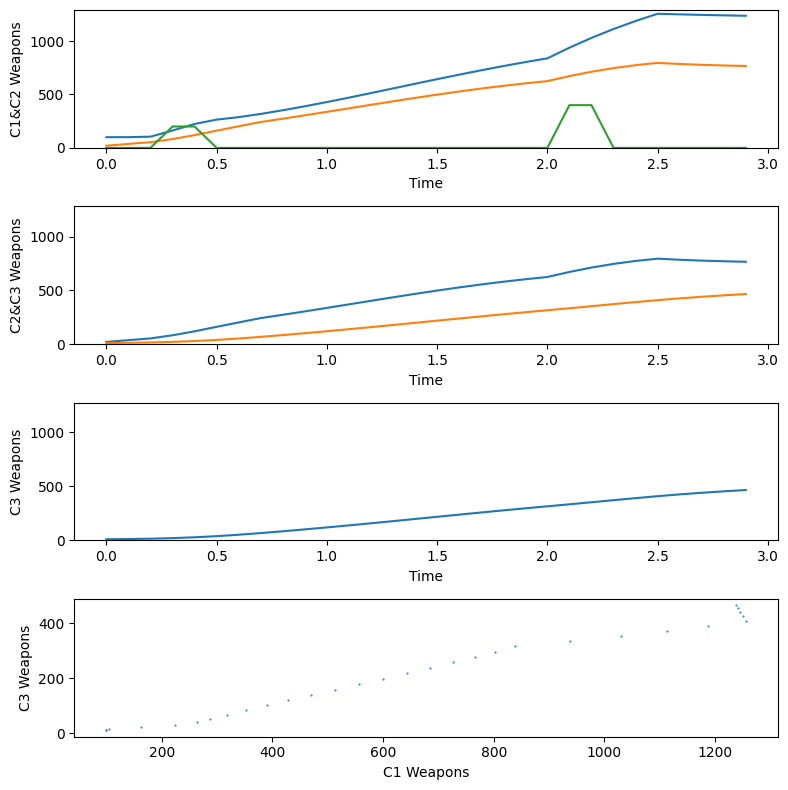

In [8]:
''' plotting results '''
fig = plt.figure(1, figsize=(8,8))

# Plot C1 Weapons as a function of time
ax1 = fig.add_subplot(411)
ax1.plot(t, psoln[:,0])
ax1.plot(t, psoln[:,1])
ax1.plot(t, k)
ax1.set_xlabel('Time')
ax1.set_ylabel('C1&C2 Weapons')
ax1.set_ylim(-1, max(psoln[:,0])+ math.sqrt(max(psoln[:,0])) )

# Plot C2 Weapons as a function of time
ax2 = fig.add_subplot(412)
ax2.plot(t, psoln[:,1])
ax2.plot(t, psoln[:,2])
ax2.set_xlabel('Time')
ax2.set_ylabel('C2&C3 Weapons')
ax2.set_ylim(-1, max(psoln[:,0])+ math.sqrt(max(psoln[:,1])) )

# Plot C2 Weapons as a function of time
ax2 = fig.add_subplot(413)
ax2.plot(t, psoln[:,2])
ax2.set_xlabel('Time')
ax2.set_ylabel('C3 Weapons')
ax2.set_ylim(-1, max(psoln[:,0])+ math.sqrt(max(psoln[:,2])) )


# Plot phase-space: C1 Weapons vs C3 Weapons
ax3 = fig.add_subplot(414)
ax3.plot(psoln[:,0], psoln[:,2], '.', ms=1)
ax3.set_xlabel('C1 Weapons')
ax3.set_ylabel('C3 Weapons')

plt.tight_layout()
plt.show()